In [30]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df = pd.read_table('testdata.txt', header=None)
df.shape

(4, 1000)

# ex1 a: compute skewness and kurtosis

stock 1:	 skewness = -0.41		kurtosis = 65.25
stock 2:	 skewness = -0.11		kurtosis = 9.13
stock 3:	 skewness = 0.08		kurtosis = 7.9
stock 4:	 skewness = 0.12		kurtosis = 9.52


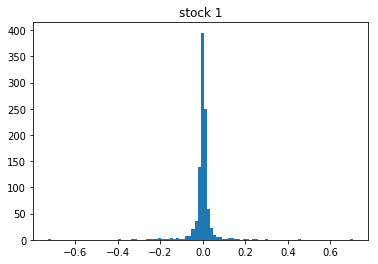

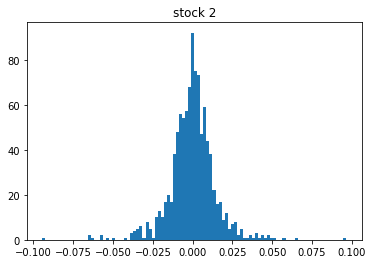

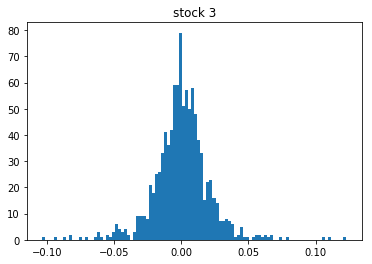

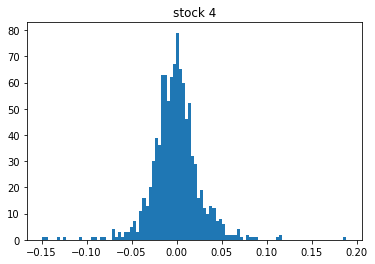

In [32]:
from scipy.stats import moment
import scipy

for stock in range(df.shape[0]):
    
    data = df.iloc[stock].tolist()
    skew = moment(data, 3)/(np.std(data))**3
    kurt = moment(data, 4)/(np.std(data))**4    
    print('stock {}:\t skewness = {}\t\tkurtosis = {}'.format(stock+1, round(skew,2), round(kurt,2)))
    
    plt.figure()
    plt.hist(data,bins = 100)
    plt.title('stock {}'.format(stock+1))
    

# EX 1B: ks test

In [33]:
from scipy.stats import kstest

for stock in range(0,df.shape[0]):
    
    current_data = df.iloc[stock].tolist()
    
    mean = round(np.mean(current_data),4)
    std = round(np.std(current_data),4)
    
    standardize = [ (d - mean)/std for d in current_data ]
    d, p_value = kstest(standardize, 'norm') 
    print('ks-test: stock {}, pvalue = {}, reject null hypothis = {}'.format(stock+1,round(p_value,6), p_value<0.05))
    print('')
    
    #You reject the null hypothesis that the two samples were drawn from the same distribution 
    #if the p-value is less than your significance level. Thus only the fourth stock can be rejected from the null hypothesis. 
    #That is , only stock 4 follows the normal distribution

ks-test: stock 1, pvalue = 0.0, reject null hypothis = True

ks-test: stock 2, pvalue = 2e-06, reject null hypothis = True

ks-test: stock 3, pvalue = 1.9e-05, reject null hypothis = True

ks-test: stock 4, pvalue = 5.9e-05, reject null hypothis = True



# ex 1c body ks test

In [34]:
from scipy.stats import kstest, anderson

largest_5_percent_num = math.floor(df.shape[1]*0.05)

for stock in range(0,df.shape[0]):
# for stock in range(0,1):
    sort_stock = np.sort(df.iloc[stock].tolist())
    
    left_tail_returns = sort_stock[:largest_5_percent_num]
#     print(len(left_tail_returns)/1000)
    middle_returns = sort_stock[(largest_5_percent_num) : -(largest_5_percent_num)]
#     print(len(middle_returns)/1000)
    right_tail_returns = sort_stock[-largest_5_percent_num:]
#     print(len(right_tail_returns)/1000)

    mid_mean = round(np.mean(middle_returns),4)
    mid_var = round(np.std(middle_returns),4)
#     print('stock {}\'s middle: mean= {}, variance= {}'.format(stock+1, mid_mean, mid_var))
    
    standardize = [ (s - mid_mean)/mid_var for s in middle_returns ]
    d, p_value = kstest(standardize, 'norm') 
    print('ks-test(90%middle):stock {},pvalue = {}, reject null hypothesis = {}'.format(stock+1, round(p_value,4), p_value<0.05))
    print('')
    
    #You reject the null hypothesis that the two samples were drawn from the same distribution 
    #if the p-value is less than your significance level. Thus only the fourth stock can be rejected from the null hypothesis. 
    #That is , only stock 4 follows the normal distribution

ks-test(90%middle):stock 1,pvalue = 0.0568, reject null hypothesis = False

ks-test(90%middle):stock 2,pvalue = 0.6856, reject null hypothesis = False

ks-test(90%middle):stock 3,pvalue = 0.8791, reject null hypothesis = False

ks-test(90%middle):stock 4,pvalue = 0.405, reject null hypothesis = False



# Exercise 2 correlation

In [35]:
df_transpose = df.transpose()
P = df_transpose.corr(method='pearson')
print(P)

          0         1         2         3
0  1.000000  0.304139  0.234264  0.249483
1  0.304139  1.000000  0.535435  0.459000
2  0.234264  0.535435  1.000000  0.465217
3  0.249483  0.459000  0.465217  1.000000


From the Pearson correlation matrix, the most correlated stocks are the second stock and the third stock. The least correlated stocks are the first and the third stocks. 

In [36]:
S = df_transpose.corr(method='spearman')
print(S)

          0         1         2         3
0  1.000000  0.509549  0.395441  0.357192
1  0.509549  1.000000  0.447780  0.437340
2  0.395441  0.447780  1.000000  0.427456
3  0.357192  0.437340  0.427456  1.000000


From the Spearman correlation matrix, the most correlated stocks are the first stock and the second stock. The least correlated stocks are the first and the last stock. 

# Exercise 3: network analysis

In [70]:
edge_list = pd.read_table('network.txt', header=None)
edge_list.shape

(499, 2)

exercise 3a: form adjacency list from link matrix

In [71]:
max_node = max(max(edge_list[0].values), max(edge_list[1].values))
max_node

500

In [74]:
import numpy as np
A = np.zeros((500,500))
A.shape

(500, 500)

In [75]:
edge_list.iloc[3][0], edge_list.iloc[3][1]

(1, 5)

In [76]:
for row in range(edge_list.shape[0]):
    i = edge_list.iloc[row][0]
    j = edge_list.iloc[row][1]
    
    if A[i-1][j-1] == 0:
        A[i-1][j-1] = 1
    
    if A[j-1][i-1] == 0:
        A[j-1][i-1] = 1
    

In [78]:
A[0][4]

1.0

In [88]:
# 3b: degree distribution
degree = np.sum(A, axis = 1)

unique_degree = np.unique(degree)
unique_degree

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  12.,
        13.,  14.,  15.,  16.,  24.,  28.,  32.])

In [108]:
import collections
collections.Counter(degree)

Counter({1.0: 340,
         2.0: 78,
         3.0: 28,
         4.0: 20,
         5.0: 6,
         6.0: 4,
         7.0: 7,
         8.0: 2,
         9.0: 5,
         10.0: 2,
         12.0: 1,
         13.0: 1,
         14.0: 1,
         15.0: 1,
         16.0: 1,
         24.0: 1,
         28.0: 1,
         32.0: 1})

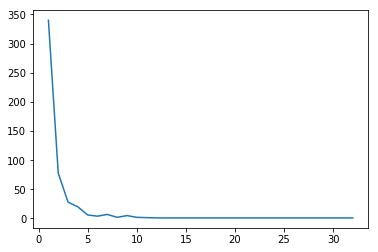

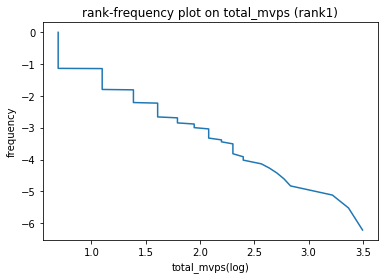

In [112]:
degree_x = [1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,24,28,32]
degree_y = [340,78,28,20,6,4,7,2,5,2,1,1,1,1,1,1,1,1]
plt.plot(degree_x, degree_y)

import math
y = degree
x = np.sort(y)
x = [math.log(i+1) for i in x]
y = [math.log(1-k/(len(x)+1) )for k in range(1, len(x)+1, 1)]

plt.figure()
plt.title('rank-frequency plot on total_mvps (rank1)')
plt.xlabel('total_mvps(log)')
plt.ylabel('frequency')
plt.plot(x,y)



In [ ]:
degree_count = []

for d in unique_degree:
    
    cur_degree = degree.

In [94]:
len(degree)

500

In [106]:
cut = math.floor(500*0.9)

sort_degree = np.sort(degree)

body = sort_degree[:cut]
tail = sort_degree[ cut : ]

minright = min(abs(tail))
log_x_right = [ math.log( abs(xi)/abs(minright)) for xi in tail]

alpha_right = len(right_tail_returns)/sum(log_x_right)

print('right exponent is:{}'.format(round(alpha_right,2)))


right exponent is:1.91


In [10]:
# 3b: degree sequence
p_degree = np.sum(P, axis = 1)
print(p_degree)

0    1.0
1    3.0
2    2.0
3    2.0
4    4.0
5    4.0
dtype: float64


# 3c：eigenvalue centrality

In [79]:
# eigenvalue centrality using pearson adjacent matrix
eigenvalues, eigenvectors = np.linalg.eig(A)
# eigenvalues

In [84]:
center_index = 0
centrality = abs(eigenvectors[:,center_index])
list(centrality).index(max(centrality))+1

13

# 3d:degree

In [85]:
degree = np.sum(A, axis = 1)
print(degree[12])

32.0


In [87]:
degree_sort = np.sort(degree)
degree_sort

array([  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   